In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime as dt
import json
import csv
import pytemperature as pyt
from pprint import pprint

# Import API key
from api_keys import api_key

# files to Load
cpd_crime2018_load = "Resources/Crimes_-_2018.csv"
cpd_crime2017_load = "Resources/Crimes_-_2017.csv"
cpd_crime2016_load = "Resources/Crimes_-_2016.csv"
cpd_crime2015_load = "Resources/Crimes_-_2015.csv"
cpd_crime2014_load = "Resources/Crimes_-_2014.csv"

# read CPD crime data and store
cpdcrime2018_data = pd.read_csv(cpd_crime2018_load)
cpdcrime2017_data = pd.read_csv(cpd_crime2017_load)
cpdcrime2016_data = pd.read_csv(cpd_crime2016_load)
cpdcrime2015_data = pd.read_csv(cpd_crime2015_load)
cpdcrime2014_data = pd.read_csv(cpd_crime2014_load)


In [2]:
#pull column data and drop NaN 
cpdcrime2018_data = cpdcrime2018_data[['Date', 'Primary Type']]
cpdcrime2018_data = cpdcrime2018_data.dropna(how='any')

cpdcrime2017_data = cpdcrime2017_data[['Date', 'Primary Type']]
cpdcrime2017_data = cpdcrime2017_data.dropna(how='any')

cpdcrime2016_data = cpdcrime2016_data[['Date', 'Primary Type']]
cpdcrime2016_data = cpdcrime2016_data.dropna(how='any')

cpdcrime2015_data = cpdcrime2015_data[['Date', 'Primary Type']]
cpdcrime2015_data = cpdcrime2015_data.dropna(how='any')

cpdcrime2014_data = cpdcrime2014_data[['Date', 'Primary Type']]
cpdcrime2014_data = cpdcrime2014_data.dropna(how='any')


In [3]:
#use to check outputs
#cpdcrime2018_data.head()
#cpdcrime2017_data.head()
#cpdcrime2016_data.head()
#cpdcrime2015_data.head()
#cpdcrime2014_data.head()

In [4]:
#create series with the date of each reported incident by primary type
battery18 = cpdcrime2018_data[cpdcrime2018_data['Primary Type'] == "BATTERY"]["Date"].reset_index()
battery17 = cpdcrime2017_data[cpdcrime2017_data['Primary Type'] == "BATTERY"]["Date"].reset_index()
battery16 = cpdcrime2016_data[cpdcrime2016_data['Primary Type'] == "BATTERY"]["Date"].reset_index()
battery15 = cpdcrime2015_data[cpdcrime2015_data['Primary Type'] == "BATTERY"]["Date"].reset_index()
battery14 = cpdcrime2014_data[cpdcrime2014_data['Primary Type'] == "BATTERY"]["Date"].reset_index()

#format date to be mergeable with weather data 
battery18['Date'] = pd.to_datetime(battery18['Date']).dt.date
battery18['Date'] = pd.to_datetime(battery18['Date'], infer_datetime_format=True)
battery17['Date'] = pd.to_datetime(battery17['Date']).dt.date
battery17['Date'] = pd.to_datetime(battery17['Date'], infer_datetime_format=True)
battery16['Date'] = pd.to_datetime(battery16['Date']).dt.date
battery16['Date'] = pd.to_datetime(battery16['Date'], infer_datetime_format=True)
battery15['Date'] = pd.to_datetime(battery15['Date']).dt.date
battery15['Date'] = pd.to_datetime(battery15['Date'], infer_datetime_format=True)
battery14['Date'] = pd.to_datetime(battery14['Date']).dt.date
battery14['Date'] = pd.to_datetime(battery14['Date'], infer_datetime_format=True)

#sort date data for chronological order
battery18.sort_values("Date", inplace=True)
battery17.sort_values("Date", inplace=True)
battery16.sort_values("Date", inplace=True)
battery15.sort_values("Date", inplace=True)
battery14.sort_values("Date", inplace=True)

#create number of reported incidents by date 
battery18['Reported Incidents'] = battery18['Date'].map(battery18['Date'].value_counts())
battery17['Reported Incidents'] = battery17['Date'].map(battery17['Date'].value_counts())
battery16['Reported Incidents'] = battery16['Date'].map(battery16['Date'].value_counts())
battery15['Reported Incidents'] = battery15['Date'].map(battery15['Date'].value_counts())
battery14['Reported Incidents'] = battery14['Date'].map(battery14['Date'].value_counts())

#set index to date and drop duplicate data
battery18.set_index('Date')
battery18.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
battery17.set_index('Date')
battery17.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
battery16.set_index('Date')
battery16.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
battery15.set_index('Date')
battery15.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
battery14.set_index('Date')
battery14.drop_duplicates(subset ="Date", keep = 'first', inplace = True)

#delete unnecessary index column
del battery18['index']
del battery17['index']
del battery16['index']
del battery15['index']
del battery14['index']

#merge all reported battery incidents for all five years
battery_all = battery18.append([battery17, battery16, battery15, battery14])

In [5]:
#use to check output
#battery18
#battery18.dtypes
#battery17
#battery17.dtypes
#battery16
#battery16.dtypes
#battery15
#battery15.dtypes
#battery14
#battery14.dtypes
#battery_all
#battery_all.dtypes

In [6]:
#create series with the date of each reported incident by primary type
csa18 = cpdcrime2018_data[cpdcrime2018_data['Primary Type'] == "CRIM SEXUAL ASSAULT"]["Date"].reset_index()
csa17 = cpdcrime2017_data[cpdcrime2017_data['Primary Type'] == "CRIM SEXUAL ASSAULT"]["Date"].reset_index()
csa16 = cpdcrime2016_data[cpdcrime2016_data['Primary Type'] == "CRIM SEXUAL ASSAULT"]["Date"].reset_index()
csa15 = cpdcrime2015_data[cpdcrime2015_data['Primary Type'] == "CRIM SEXUAL ASSAULT"]["Date"].reset_index()
csa14 = cpdcrime2014_data[cpdcrime2014_data['Primary Type'] == "CRIM SEXUAL ASSAULT"]["Date"].reset_index()

#format date in dataframe to be mergeable with weather data 
csa18['Date'] = pd.to_datetime(csa18['Date']).dt.date
csa18['Date'] = pd.to_datetime(csa18['Date'], infer_datetime_format=True)
csa17['Date'] = pd.to_datetime(csa17['Date']).dt.date
csa17['Date'] = pd.to_datetime(csa17['Date'], infer_datetime_format=True)
csa16['Date'] = pd.to_datetime(csa16['Date']).dt.date
csa16['Date'] = pd.to_datetime(csa16['Date'], infer_datetime_format=True)
csa15['Date'] = pd.to_datetime(csa15['Date']).dt.date
csa15['Date'] = pd.to_datetime(csa15['Date'], infer_datetime_format=True)
csa14['Date'] = pd.to_datetime(csa14['Date']).dt.date
csa14['Date'] = pd.to_datetime(csa14['Date'], infer_datetime_format=True)

#sort date data for chronological order
csa18.sort_values("Date", inplace=True)
csa17.sort_values("Date", inplace=True)
csa16.sort_values("Date", inplace=True)
csa15.sort_values("Date", inplace=True)
csa14.sort_values("Date", inplace=True)

#create number of reported incidents by date 
csa18['Reported Incidents'] = csa18['Date'].map(csa18['Date'].value_counts())
csa17['Reported Incidents'] = csa17['Date'].map(csa17['Date'].value_counts())
csa16['Reported Incidents'] = csa16['Date'].map(csa16['Date'].value_counts())
csa15['Reported Incidents'] = csa15['Date'].map(csa15['Date'].value_counts())
csa14['Reported Incidents'] = csa14['Date'].map(csa14['Date'].value_counts())

#set index to date and drop duplicate data
csa18.set_index('Date')
csa18.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
csa17.set_index('Date')
csa17.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
csa16.set_index('Date')
csa16.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
csa15.set_index('Date')
csa15.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
csa14.set_index('Date')
csa14.drop_duplicates(subset ="Date", keep = 'first', inplace = True)


#delete unnecessary index column
del csa18['index']
del csa17['index']
del csa16['index']
del csa15['index']
del csa14['index']

#merge all reported criminal sexual assault incidents for all five years
csa_all = csa18.append([csa17, csa16, csa15, csa14])

In [7]:
#use to check output
#csa18
#csa18.dtypes
#csa17
#csa17.dtypes
#csa16
#csa16.dtypes
#csa15
#csa15.dtypes
#csa14
#csa14.dtypes
#csa_all
#csa_all.dtypes

In [8]:
#create series with the date of each reported incident by primary type
homicide18 = cpdcrime2018_data[cpdcrime2018_data['Primary Type'] == "HOMICIDE"]["Date"].reset_index()
homicide17 = cpdcrime2017_data[cpdcrime2017_data['Primary Type'] == "HOMICIDE"]["Date"].reset_index()
homicide16 = cpdcrime2016_data[cpdcrime2016_data['Primary Type'] == "HOMICIDE"]["Date"].reset_index()
homicide15 = cpdcrime2015_data[cpdcrime2015_data['Primary Type'] == "HOMICIDE"]["Date"].reset_index()
homicide14 = cpdcrime2014_data[cpdcrime2014_data['Primary Type'] == "HOMICIDE"]["Date"].reset_index()

#format date in dataframe to be mergeable with weather data 
homicide18['Date'] = pd.to_datetime(homicide18['Date']).dt.date
homicide18['Date'] = pd.to_datetime(homicide18['Date'], infer_datetime_format=True)
homicide17['Date'] = pd.to_datetime(homicide17['Date']).dt.date
homicide17['Date'] = pd.to_datetime(homicide17['Date'], infer_datetime_format=True)
homicide16['Date'] = pd.to_datetime(homicide16['Date']).dt.date
homicide16['Date'] = pd.to_datetime(homicide16['Date'], infer_datetime_format=True)
homicide15['Date'] = pd.to_datetime(homicide15['Date']).dt.date
homicide15['Date'] = pd.to_datetime(homicide15['Date'], infer_datetime_format=True)
homicide14['Date'] = pd.to_datetime(homicide14['Date']).dt.date
homicide14['Date'] = pd.to_datetime(homicide14['Date'], infer_datetime_format=True)

#sort date data for chronological order
homicide18.sort_values("Date", inplace=True)
homicide17.sort_values("Date", inplace=True)
homicide16.sort_values("Date", inplace=True)
homicide15.sort_values("Date", inplace=True)
homicide14.sort_values("Date", inplace=True)

#create number of reported incidents by date 
homicide18['Reported Incidents'] = homicide18['Date'].map(homicide18['Date'].value_counts())
homicide17['Reported Incidents'] = homicide17['Date'].map(homicide17['Date'].value_counts())
homicide16['Reported Incidents'] = homicide16['Date'].map(homicide16['Date'].value_counts())
homicide15['Reported Incidents'] = homicide15['Date'].map(homicide15['Date'].value_counts())
homicide14['Reported Incidents'] = homicide14['Date'].map(homicide14['Date'].value_counts())

#set index to date and drop duplicate data
homicide18.set_index('Date')
homicide18.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
homicide17.set_index('Date')
homicide17.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
homicide16.set_index('Date')
homicide16.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
homicide15.set_index('Date')
homicide15.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
homicide14.set_index('Date')
homicide14.drop_duplicates(subset ="Date", keep = 'first', inplace = True)


#delete unnecessary index column
del homicide18['index']
del homicide17['index']
del homicide16['index']
del homicide15['index']
del homicide14['index']


#merge all reported homicide incidents for all five years
homicide_all = homicide18.append([homicide17, homicide16, homicide15, homicide14])

In [9]:
#use to check output
#homicide18
#homicide18.dtypes
#homicide17
#homicide17.dtypes
#homicide16
#homicide16.dtypes
#homicide15
#homicide15.dtypes
#homicide14
#homicide14.dtypes
#homicide_all
#homicide_all.dtypes

In [10]:
#create series with the date of each reported incident by primary type
robbery18 = cpdcrime2018_data[cpdcrime2018_data['Primary Type'] == "ROBBERY"]["Date"].reset_index()
robbery17 = cpdcrime2017_data[cpdcrime2017_data['Primary Type'] == "ROBBERY"]["Date"].reset_index()
robbery16 = cpdcrime2016_data[cpdcrime2016_data['Primary Type'] == "ROBBERY"]["Date"].reset_index()
robbery15 = cpdcrime2015_data[cpdcrime2015_data['Primary Type'] == "ROBBERY"]["Date"].reset_index()
robbery14 = cpdcrime2014_data[cpdcrime2014_data['Primary Type'] == "ROBBERY"]["Date"].reset_index()

#format date in dataframe to be mergeable with weather data 
robbery18['Date'] = pd.to_datetime(robbery18['Date']).dt.date
robbery18['Date'] = pd.to_datetime(robbery18['Date'], infer_datetime_format=True)
robbery17['Date'] = pd.to_datetime(robbery17['Date']).dt.date
robbery17['Date'] = pd.to_datetime(robbery17['Date'], infer_datetime_format=True)
robbery16['Date'] = pd.to_datetime(robbery16['Date']).dt.date
robbery16['Date'] = pd.to_datetime(robbery16['Date'], infer_datetime_format=True)
robbery15['Date'] = pd.to_datetime(robbery15['Date']).dt.date
robbery15['Date'] = pd.to_datetime(robbery15['Date'], infer_datetime_format=True)
robbery14['Date'] = pd.to_datetime(robbery14['Date']).dt.date
robbery14['Date'] = pd.to_datetime(robbery14['Date'], infer_datetime_format=True)

#sort date data for chronological order
robbery18.sort_values("Date", inplace=True)
robbery17.sort_values("Date", inplace=True)
robbery16.sort_values("Date", inplace=True)
robbery15.sort_values("Date", inplace=True)
robbery14.sort_values("Date", inplace=True)

#create number of reported incidents by date 
robbery18['Reported Incidents'] = robbery18['Date'].map(robbery18['Date'].value_counts())
robbery17['Reported Incidents'] = robbery17['Date'].map(robbery17['Date'].value_counts())
robbery16['Reported Incidents'] = robbery16['Date'].map(robbery16['Date'].value_counts())
robbery15['Reported Incidents'] = robbery15['Date'].map(robbery15['Date'].value_counts())
robbery14['Reported Incidents'] = robbery14['Date'].map(robbery14['Date'].value_counts())

#set index to date and drop duplicate data
robbery18.set_index('Date')
robbery18.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
robbery17.set_index('Date')
robbery17.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
robbery16.set_index('Date')
robbery16.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
robbery15.set_index('Date')
robbery15.drop_duplicates(subset ="Date", keep = 'first', inplace = True)
robbery14.set_index('Date')
robbery14.drop_duplicates(subset ="Date", keep = 'first', inplace = True)

#delete unnecessary index column
del robbery18['index']
del robbery17['index']
del robbery16['index']
del robbery15['index']
del robbery14['index']

#merge all reported robbery incidents for all five years
robbery_all = robbery18.append([robbery17, robbery16, robbery15, robbery14])

In [11]:
#use to check output
#robbery18
#robbery18.dtypes
#robbery17
#robbery17.dtypes
#robbery16
#robbery16.dtypes
#robbery15
#robbery15.dtypes
#robbery14
#robbery14.dtypes
#robbery_all
#robbery_all.dtypes

In [12]:
#begin OpenWeatherMap data

In [13]:
Datetime = []
Max_Temp = []
Humidity = []
Cloudiness = []

In [14]:
file = open("weather_data.json")
json_data = json.load(file)

In [15]:
for each in json_data["values"]:
        Datetime.append(each["dt"])
        Max_Temp.append(each["main"]["temp_max"])
        Humidity.append(each["main"]["humidity"])
        Cloudiness.append(each["clouds"]["all"])

In [16]:
weather_df1 = pd.DataFrame({"Datetime": Datetime,
                            "Max_Temp": Max_Temp,
                            "Humidity": Humidity,
                            "Cloudiness": Cloudiness})

weather_df1.head()

,Datetime,Max_Temp,Humidity,Cloudiness
0,1349096400,287.59,71,90
1,1349186400,288.71,62,90
2,1349190000,290.37,51,90
3,1349193600,290.93,0,92
4,1349197200,292.04,0,92


In [17]:
weather_df1["Datetime"]=pd.to_datetime(weather_df1["Datetime"],unit='s')
weather_df1.head(5)

,Datetime,Max_Temp,Humidity,Cloudiness
0,2012-10-01 13:00:00,287.59,71,90
1,2012-10-02 14:00:00,288.71,62,90
2,2012-10-02 15:00:00,290.37,51,90
3,2012-10-02 16:00:00,290.93,0,92
4,2012-10-02 17:00:00,292.04,0,92


In [18]:
weather_df1["Date"] = pd.to_datetime(weather_df1['Datetime']).dt.date
weather_df1["Date"] = pd.to_datetime(weather_df1['Date'], infer_datetime_format=True)
weather_df1["Time"] = pd.to_datetime(weather_df1['Datetime']).dt.time
weather_df1["Time"] = pd.to_datetime(weather_df1['Datetime'], infer_datetime_format=True)

weather_df1['Month'] = weather_df1['Date'].dt.month
weather_df1['Day'] = weather_df1['Date'].dt.day
weather_df1['Year'] = weather_df1['Date'].dt.year

weather_df1.head()

,Datetime,Max_Temp,Humidity,Cloudiness,Date,Time,Month,Day,Year
0,2012-10-01 13:00:00,287.59,71,90,2012-10-01,2012-10-01 13:00:00,10,1,2012
1,2012-10-02 14:00:00,288.71,62,90,2012-10-02,2012-10-02 14:00:00,10,2,2012
2,2012-10-02 15:00:00,290.37,51,90,2012-10-02,2012-10-02 15:00:00,10,2,2012
3,2012-10-02 16:00:00,290.93,0,92,2012-10-02,2012-10-02 16:00:00,10,2,2012
4,2012-10-02 17:00:00,292.04,0,92,2012-10-02,2012-10-02 17:00:00,10,2,2012


In [19]:
weather_df1["Max_Temp_(F)"]=pyt.k2f(weather_df1["Max_Temp"])
weather_df1.head()

,Datetime,Max_Temp,Humidity,Cloudiness,Date,Time,Month,Day,Year,Max_Temp_(F)
0,2012-10-01 13:00:00,287.59,71,90,2012-10-01,2012-10-01 13:00:00,10,1,2012,57.97
1,2012-10-02 14:00:00,288.71,62,90,2012-10-02,2012-10-02 14:00:00,10,2,2012,59.99
2,2012-10-02 15:00:00,290.37,51,90,2012-10-02,2012-10-02 15:00:00,10,2,2012,62.98
3,2012-10-02 16:00:00,290.93,0,92,2012-10-02,2012-10-02 16:00:00,10,2,2012,63.98
4,2012-10-02 17:00:00,292.04,0,92,2012-10-02,2012-10-02 17:00:00,10,2,2012,65.98


In [20]:
# del weather_df1['Datetime']
del weather_df1["Max_Temp"]
del weather_df1["Datetime"]
weather_df1.head()


,Humidity,Cloudiness,Date,Time,Month,Day,Year,Max_Temp_(F)
0,71,90,2012-10-01,2012-10-01 13:00:00,10,1,2012,57.97
1,62,90,2012-10-02,2012-10-02 14:00:00,10,2,2012,59.99
2,51,90,2012-10-02,2012-10-02 15:00:00,10,2,2012,62.98
3,0,92,2012-10-02,2012-10-02 16:00:00,10,2,2012,63.98
4,0,92,2012-10-02,2012-10-02 17:00:00,10,2,2012,65.98


In [21]:
weather_df2 = pd.DataFrame(weather_df1.groupby("Date")["Humidity", "Cloudiness", "Max_Temp_(F)", "Month", "Day", "Year"].mean())
weather_df2.head()
#weather_df2.columns

,Humidity,Cloudiness,Max_Temp_(F),Month,Day,Year
Date,,,,,,
2012-10-01,71.000000,90.000000,57.970000,10.0,1.0,2012.0
2012-10-02,25.100000,93.400000,64.040000,10.0,2.0,2012.0
2012-10-03,50.550000,72.000000,64.363500,10.0,3.0,2012.0
2012-10-04,66.916667,75.125000,64.404167,10.0,4.0,2012.0
2012-10-05,65.863636,48.272727,68.235909,10.0,5.0,2012.0


In [22]:
pd.to_datetime('2014-10-14')
weather_df2.loc[pd.to_datetime('2014-07-26')]

Humidity          71.208333
Cloudiness        66.750000
Max_Temp_(F)      75.662500
Month              7.000000
Day               26.000000
Year            2014.000000
Name: 2014-07-26 00:00:00, dtype: float64

In [23]:
#begin merging CPD crime data with weather data

In [24]:
#combine weather data into crime incident data for final dataframes
weatherbattery18 = battery18.merge(weather_df2, how='left', on='Date')
weatherbattery17 = battery17.merge(weather_df2, how='left', on='Date')
weatherbattery16 = battery16.merge(weather_df2, how='left', on='Date')
weatherbattery15 = battery15.merge(weather_df2, how='left', on='Date')
weatherbattery14 = battery14.merge(weather_df2, how='left', on='Date')
weatherbatteryall = battery_all.merge(weather_df2, how='left', on='Date')

#calculate number of NaN values then drop them
weatherbattery18nan = pd.isnull(weatherbattery18).sum()
weatherbattery18 = weatherbattery18.dropna(how='any')
weatherbattery17nan = pd.isnull(weatherbattery17).sum()
weatherbattery17 = weatherbattery17.dropna(how='any')
weatherbattery16nan = pd.isnull(weatherbattery16).sum()
weatherbattery16 = weatherbattery16.dropna(how='any')
weatherbattery15nan = pd.isnull(weatherbattery15).sum()
weatherbattery15 = weatherbattery15.dropna(how='any')
weatherbattery14nan = pd.isnull(weatherbattery14).sum()
weatherbattery14 = weatherbattery14.dropna(how='any')
weatherbatteryallnan = pd.isnull(weatherbatteryall).sum()
weatherbatteryall = weatherbatteryall.dropna(how='any')

In [25]:
#use to check outputs
#weatherbattery18nan
#weatherbattery18
#weatherbattery17nan
#weatherbattery17
#weatherbattery16nan
#weatherbattery16
#weatherbattery15nan
#weatherbattery15
#weatherbattery14nan
#weatherbattery14
#weatherbatteryallnan
weatherbatteryall

,Date,Reported Incidents,Humidity,Cloudiness,Max_Temp_(F),Month,Day,Year
0,2018-01-01,158,54.291667,9.250000,2.655000,1.0,1.0,2018.0
1,2018-01-02,89,66.750000,6.458333,-0.120000,1.0,2.0,2018.0
2,2018-01-03,81,66.833333,60.416667,12.780000,1.0,3.0,2018.0
3,2018-01-04,102,60.125000,31.208333,11.355000,1.0,4.0,2018.0
4,2018-01-05,107,59.750000,11.708333,7.230000,1.0,5.0,2018.0
5,2018-01-06,131,54.833333,11.625000,8.730000,1.0,6.0,2018.0
6,2018-01-07,120,62.000000,62.958333,17.955000,1.0,7.0,2018.0
7,2018-01-08,98,86.875000,71.333333,35.355000,1.0,8.0,2018.0
8,2018-01-09,98,91.375000,54.708333,32.430000,1.0,9.0,2018.0
9,2018-01-10,112,93.208333,81.958333,38.730000,1.0,10.0,2018.0


In [26]:
#combine weather data into crime incident data for final dataframes
weathercsa18 = csa18.merge(weather_df2, how='left', on='Date')
weathercsa17 = csa17.merge(weather_df2, how='left', on='Date')
weathercsa16 = csa16.merge(weather_df2, how='left', on='Date')
weathercsa15 = csa15.merge(weather_df2, how='left', on='Date')
weathercsa14 = csa14.merge(weather_df2, how='left', on='Date')
weathercsaall = csa_all.merge(weather_df2, how='left', on='Date')

#calculate number of NaN values then drop them
weathercsa18nan = pd.isnull(weathercsa18).sum()
weathercsa18 = weathercsa18.dropna(how='any')
weathercsa17nan = pd.isnull(weathercsa17).sum()
weathercsa17 = weathercsa17.dropna(how='any')
weathercsa16nan = pd.isnull(weathercsa16).sum()
weathercsa16 = weathercsa16.dropna(how='any')
weathercsa15nan = pd.isnull(weathercsa15).sum()
weathercsa15 = weathercsa15.dropna(how='any')
weathercsa14nan = pd.isnull(weathercsa14).sum()
weathercsa14 = weathercsa14.dropna(how='any')
weathercsaallnan = pd.isnull(weathercsaall).sum()
weathercsaall = weathercsaall.dropna(how='any')

In [27]:
#use to check outputs
#weathercsa18nan
#weathercsa18
#weathercsa17nan
#weathercsa17
#weathercsa16nan
#weathercsa16
#weathercsa15nan
#weathercsa15
#weathercsa14nan
#weathercsa14
#weathercsaallnan
weathercsaall.head()

,Date,Reported Incidents,Humidity,Cloudiness,Max_Temp_(F),Month,Day,Year
0,2018-01-01,16,54.291667,9.250000,2.655,1.0,1.0,2018.0
1,2018-01-02,2,66.750000,6.458333,-0.120,1.0,2.0,2018.0
2,2018-01-03,3,66.833333,60.416667,12.780,1.0,3.0,2018.0
3,2018-01-05,3,59.750000,11.708333,7.230,1.0,5.0,2018.0
4,2018-01-06,5,54.833333,11.625000,8.730,1.0,6.0,2018.0


In [28]:
#combine weather data into crime incident data for final dataframes
weatherhomicide18 = homicide18.merge(weather_df2, how='left', on='Date')
weatherhomicide17 = homicide17.merge(weather_df2, how='left', on='Date')
weatherhomicide16 = homicide16.merge(weather_df2, how='left', on='Date')
weatherhomicide15 = homicide15.merge(weather_df2, how='left', on='Date')
weatherhomicide14 = homicide14.merge(weather_df2, how='left', on='Date')
weatherhomicideall = homicide_all.merge(weather_df2, how='left', on='Date')

#calculate number of NaN values then drop them
weatherhomicide18nan = pd.isnull(weatherhomicide18).sum()
weatherhomicide18 = weatherhomicide18.dropna(how='any')
weatherhomicide17nan = pd.isnull(weatherhomicide17).sum()
weatherhomicide17 = weatherhomicide17.dropna(how='any')
weatherhomicide16nan = pd.isnull(weatherhomicide16).sum()
weatherhomicide16 = weatherhomicide16.dropna(how='any')
weatherhomicide15nan = pd.isnull(weatherhomicide15).sum()
weatherhomicide15 = weatherhomicide15.dropna(how='any')
weatherhomicide14nan = pd.isnull(weatherhomicide14).sum()
weatherhomicide14 = weatherhomicide14.dropna(how='any')
weatherhomicideallnan = pd.isnull(weatherhomicideall).sum()
weatherhomicideall = weatherhomicideall.dropna(how='any')

In [29]:
#use to check outputs
#weatherhomicide18nan
#weatherhomicide18
#weatherhomicide17nan
#weatherhomicide17
#weatherhomicide16nan
#weatherhomicide16
#weatherhomicide15nan
#weatherhomicide15
#weatherhomicide14nan
#weatherhomicide14
#weatherhomicideallnan
weatherhomicideall.head()

,Date,Reported Incidents,Humidity,Cloudiness,Max_Temp_(F),Month,Day,Year
0,2018-01-01,4,54.291667,9.250000,2.655,1.0,1.0,2018.0
1,2018-01-05,1,59.750000,11.708333,7.230,1.0,5.0,2018.0
2,2018-01-06,3,54.833333,11.625000,8.730,1.0,6.0,2018.0
3,2018-01-07,2,62.000000,62.958333,17.955,1.0,7.0,2018.0
4,2018-01-09,4,91.375000,54.708333,32.430,1.0,9.0,2018.0


In [30]:
#combine weather data into crime incident data for final dataframes
weatherrobbery18 = robbery18.merge(weather_df2, how='left', on='Date')
weatherrobbery17 = robbery17.merge(weather_df2, how='left', on='Date')
weatherrobbery16 = robbery16.merge(weather_df2, how='left', on='Date')
weatherrobbery15 = robbery15.merge(weather_df2, how='left', on='Date')
weatherrobbery14 = robbery14.merge(weather_df2, how='left', on='Date')
weatherrobberyall = robbery_all.merge(weather_df2, how='left', on='Date')

#calculate number of NaN values then drop them
weatherrobbery18nan = pd.isnull(weatherrobbery18).sum()
weatherrobbery18 = weatherrobbery18.dropna(how='any')
weatherrobbery17nan = pd.isnull(weatherrobbery17).sum()
weatherrobbery17 = weatherrobbery17.dropna(how='any')
weatherrobbery16nan = pd.isnull(weatherrobbery16).sum()
weatherrobbery16 = weatherrobbery16.dropna(how='any')
weatherrobbery15nan = pd.isnull(weatherrobbery15).sum()
weatherrobbery15 = weatherrobbery15.dropna(how='any')
weatherrobbery14nan = pd.isnull(weatherrobbery14).sum()
weatherrobbery14 = weatherrobbery14.dropna(how='any')
weatherrobberyallnan = pd.isnull(weatherrobberyall).sum()
weatherrobberyall = weatherrobberyall.dropna(how='any')

In [31]:
#use to check outputs
#weatherrobbery18nan
#weatherrobbery18
#weatherrobbery17nan
#weatherrobbery17
#weatherrobbery16nan
#weatherrobbery16
#weatherrobbery15nan
#weatherrobbery15
#weatherrobbery14nan
#weatherrobbery14
weatherrobberyall.head()

,Date,Reported Incidents,Humidity,Cloudiness,Max_Temp_(F),Month,Day,Year
0,2018-01-01,30,54.291667,9.250000,2.655,1.0,1.0,2018.0
1,2018-01-02,28,66.750000,6.458333,-0.120,1.0,2.0,2018.0
2,2018-01-03,37,66.833333,60.416667,12.780,1.0,3.0,2018.0
3,2018-01-04,32,60.125000,31.208333,11.355,1.0,4.0,2018.0
4,2018-01-05,34,59.750000,11.708333,7.230,1.0,5.0,2018.0


<Figure size 432x288 with 0 Axes>

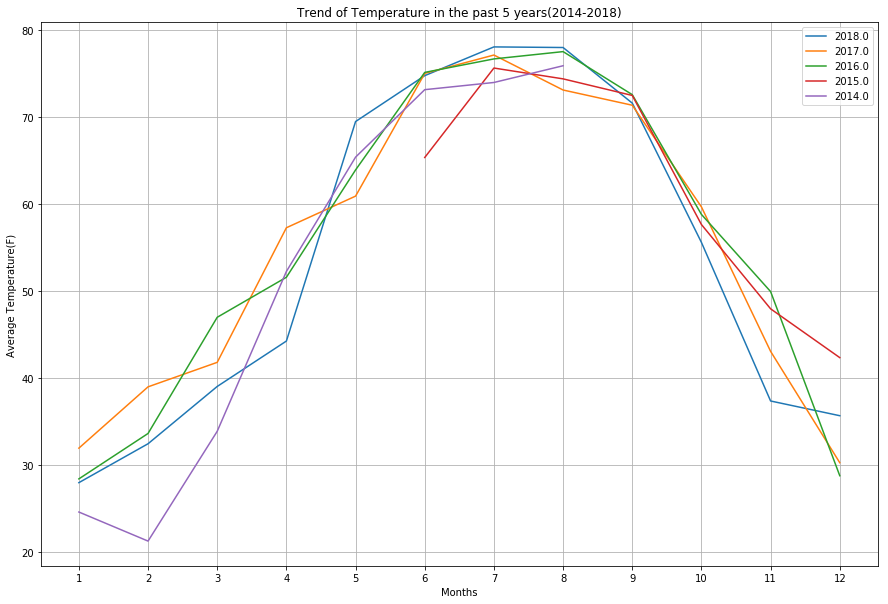

In [32]:
#temperature vs time
plt.figure()
fig, ax = plt.subplots(figsize=(15,10))
for y in weatherbatteryall['Year'].unique().tolist():
   dat = weatherbatteryall[weatherbatteryall['Year']==y]
   dat = dat[['Year','Month','Max_Temp_(F)']].drop_duplicates()
   dat = pd.DataFrame(dat.groupby(['Year','Month'])['Max_Temp_(F)'].mean()) 
   temps = [x[0] for x in dat.values.tolist()]
   dates = dat.index.levels[1].tolist() 
   ax.plot(dates,temps,label=y)
plt.xticks(weatherbatteryall[weatherbatteryall['Year']==2018]['Month'].unique().tolist())
plt.xlabel('Months')
plt.ylabel("Average Temperature(F)")
plt.title("Trend of Temperature in the past 5 years(2014-2018)")
plt.legend()
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

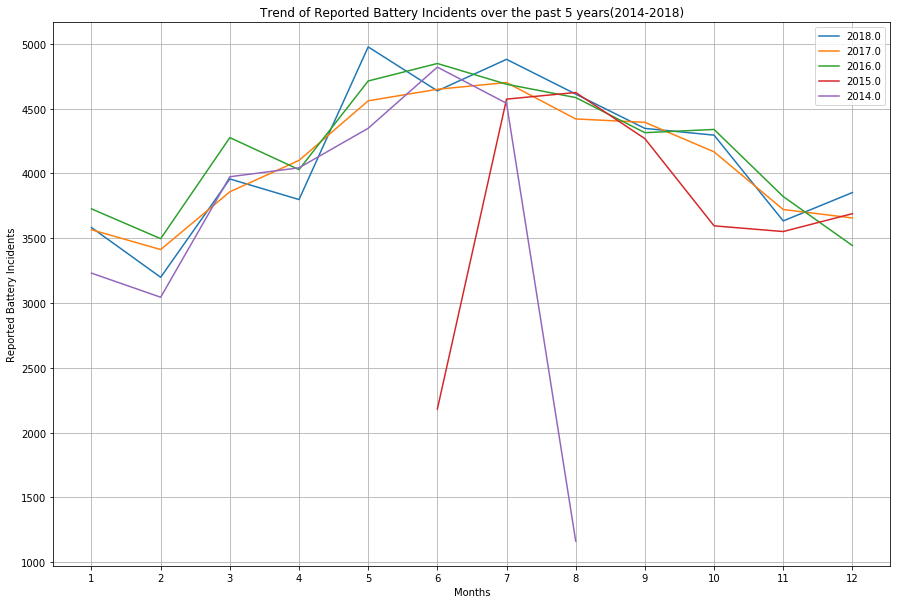

In [33]:
#Crime(Battery) vs Time over 5 Years 2014-2018
plt.figure()
fig, ax = plt.subplots(figsize=(15,10))
for y in weatherbatteryall['Year'].unique().tolist():
   dat = weatherbatteryall[weatherbatteryall['Year']==y]
   dat = dat[['Year','Month','Reported Incidents']]
   dat = pd.DataFrame(dat.groupby(['Year','Month'])['Reported Incidents'].sum()) 
   bincidents = [x[0] for x in dat.values.tolist()]
   dates = dat.index.levels[1].tolist() 
   ax.plot(dates,bincidents,label=y)
plt.xticks(weatherbatteryall[weatherbatteryall['Year']==2018]['Month'].unique().tolist())
plt.xlabel('Months')
plt.ylabel("Reported Battery Incidents")
plt.title("Trend of Reported Battery Incidents over the past 5 years(2014-2018)")
plt.legend()
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

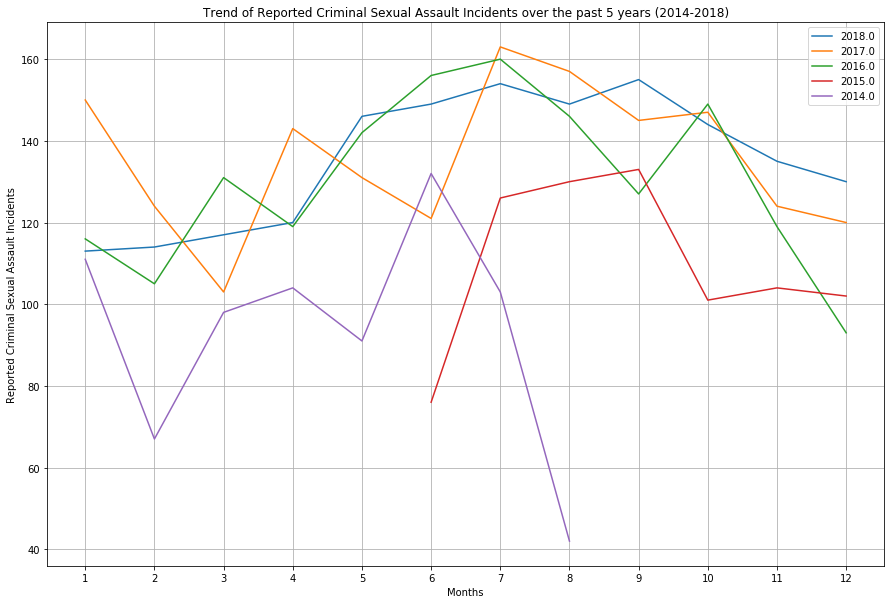

In [34]:
#Crime(Sexual Assault) vs Time over 5 Years 2014-2018
plt.figure()
fig, ax = plt.subplots(figsize=(15,10))
for y in weathercsaall['Year'].unique().tolist():
   dat = weathercsaall[weathercsaall['Year']==y]
   dat = dat[['Year','Month','Reported Incidents']]
   dat = pd.DataFrame(dat.groupby(['Year','Month'])['Reported Incidents'].sum()) 
   csa_incidents = [x[0] for x in dat.values.tolist()]
   dates = dat.index.levels[1].tolist() 
   ax.plot(dates,csa_incidents,label=y)
plt.xticks(weathercsaall[weathercsaall['Year']==2018]['Month'].unique().tolist())
plt.xlabel('Months')
plt.ylabel("Reported Criminal Sexual Assault Incidents")
plt.title("Trend of Reported Criminal Sexual Assault Incidents over the past 5 years (2014-2018)")
plt.legend()
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

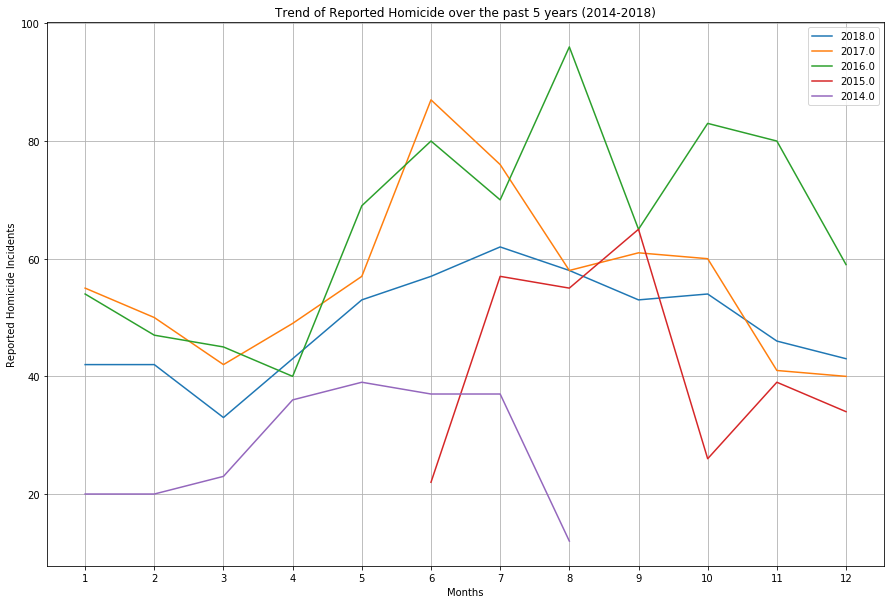

In [35]:
#Crime(Homicide) vs Time over 5 Years 2014-2018
plt.figure()
fig, ax = plt.subplots(figsize=(15,10))
for y in weatherhomicideall['Year'].unique().tolist():
   dat = weatherhomicideall[weatherhomicideall['Year']==y]
   dat = dat[['Year','Month','Reported Incidents']]
   dat = pd.DataFrame(dat.groupby(['Year','Month'])['Reported Incidents'].sum()) 
   h_incidents = [x[0] for x in dat.values.tolist()]
   dates = dat.index.levels[1].tolist() 
   ax.plot(dates,h_incidents,label=y)
plt.xticks(weatherhomicideall[weatherhomicideall['Year']==2018]['Month'].unique().tolist())
plt.xlabel('Months')
plt.ylabel("Reported Homicide Incidents")
plt.title("Trend of Reported Homicide over the past 5 years (2014-2018)")
plt.legend()
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

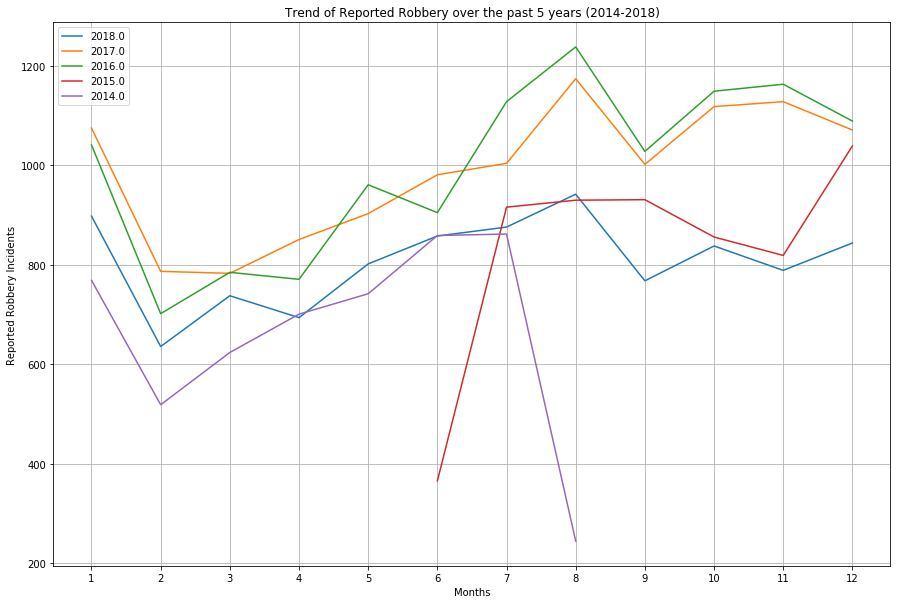

In [36]:
#Crime(Robbery) vs Time over 5 Years 2014-2018
plt.figure()
fig, ax = plt.subplots(figsize=(15,10))
for y in weatherrobberyall['Year'].unique().tolist():
   dat = weatherrobberyall[weatherrobberyall['Year']==y]
   dat = dat[['Year','Month','Reported Incidents']]
   dat = pd.DataFrame(dat.groupby(['Year','Month'])['Reported Incidents'].sum()) 
   r_incidents = [x[0] for x in dat.values.tolist()]
   dates = dat.index.levels[1].tolist() 
   ax.plot(dates,r_incidents,label=y)
plt.xticks(weatherrobberyall[weatherrobberyall['Year']==2018]['Month'].unique().tolist())
plt.xlabel('Months')
plt.ylabel("Reported Robbery Incidents")
plt.title("Trend of Reported Robbery over the past 5 years (2014-2018)")
plt.legend()
plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

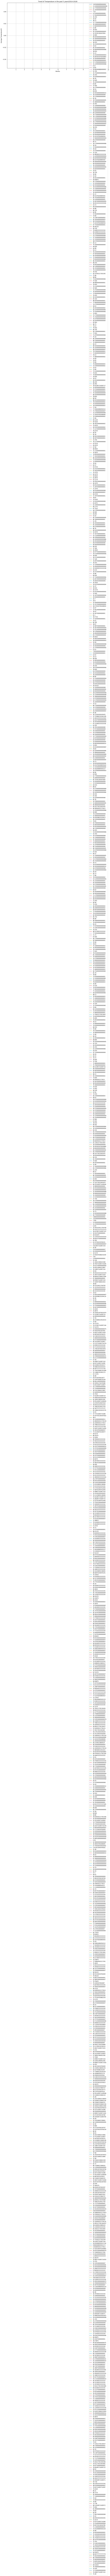

In [39]:
plt.figure()
fig, ax = plt.subplots(figsize=(15,10))

for y in weatherbatteryall['Max_Temp_(F)'].unique().tolist():
   dat = weatherbatteryall[weatherbatteryall['Year']==y]
   dat = dat[['Year','Month','Reported Incidents']].drop_duplicates()
   dat = pd.DataFrame(dat.groupby(['Year','Month'])['Reported Incidents'].sum())  
   temps = [x[0] for x in dat.values.tolist()]
   dates = dat.index.levels[1].tolist() 
   ax.plot(temps,dates,label=y)
plt.xticks(weatherbatteryall[weatherbatteryall['Year']==2018]['Month'].unique().tolist())
plt.xlabel('Months')
plt.ylabel("Average Temperature(F)")
plt.title("Trend of Temperature in the past 5 years(2014-2018)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
#plt.figure(figsize = (30, 15))
#for y in weatherrobberyall['Year'].unique().tolist():
 #   dat = weatherbatteryall[weatherbatteryall['Year']==y]
 #   dat = dat[['Year','Month','Reported Incidents']].drop_duplicates()
 #   dat = pd.DataFrame(dat.groupby(['Year','Month'])['Reported Incidents'].sum()) 
 #   dates = dat.index.levels[1].tolist()

#plt.errorbar( x=dates,y=weatherbatteryall['Max_Temp_(F)'], yerr=None, linestyle="-", color='blue', marker='o')
#Change - reported incedents into Total count //To Do

#plt.xlabel('Temp')
#plt.ylabel('Reported Battery Incidents')
#plt.title('Trend of Reported Robbery over the past 5 years (2014-2018)')
#plt.grid()
#plt.legend() 


#Crime Vs Temp - 
#plt.figure()
#fig, ax = plt.subplots(figsize=(15,10))
#for x in weatherrobberyall['Year'].unique().tolist():
#   dat = weatherrobberyall[weatherrobberyall['Year']==y]
#   dat = dat[['Year','Month','Reported Incidents']].drop_duplicates()
#   dat = pd.DataFrame(dat.groupby(['Year','Month'])['Reported Incidents'].sum()) 
#   r_incidents = [x[0] for x in dat.values.tolist()]
#   dates = dat.index.levels[1].tolist() 
#   
#for y in weatherbatteryall['Year'].unique().tolist():
#   dat1 = weatherbatteryall[weatherbatteryall['Year']==y]
#   dat1 = dat1[['Year','Month','Max_Temp_(F)']].drop_duplicates()
#   dat1 = pd.DataFrame(dat1.groupby(['Year','Month'])['Max_Temp_(F)'].mean()) 
#   temps1 = [x[0] for x in dat.values.tolist()]
#   dates1 = dat1.index.levels[1].tolist() 

#   ax.plot(dates1,r_incidents,label=y)
#plt.xticks(weatherbatteryall[weatherbatteryall['Year']==2018]['Month'].unique().tolist())


#plt.xlabel('Months')
#plt.ylabel("Reported Robbery Incidents")
#plt.title("Trend of Reported Robbery over the past 5 years (2014-2018)")
#plt.legend()
#plt.grid()
#plt.show()

#weatherrobberyall.columns

#weatherrobberyall1= weatherrobberyall[["Reported Incidents","Max_Temp_(F)"]]
#weatherrobberyall1.head()

#count_chart = weatherrobberyall1.plot(kind='bar')
# Set the xlabel and ylabel using class methods
#count_chart.set_xlabel("Max Temperature")
#count_chart.set_ylabel("Reported Robbery")


#plt.show()
#plt.tight_layout()


#weatherrobberyall = weatherrobberyall.set_index('Year')
#weatehrrobberyall.head()

# Collect the meantemperature over the last 5 years 
#average_temperature = weatherrobberyall[["Max_Temp_(F)"]].mean()
#average_temperature
# Collect the years where data was collected
#weatherrobberyall = weatherrobberyall.set_index("Year")

#years = [2018]
# Plot the world average as a line chart
#world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
#roberry_2018, = plt.plot(years, weatherrobberyall.loc["2018.0",["Reported Incidents","Max_Temp_(F)"]], color="green",label=weatherrobberyall.loc['2018.0',"Year"])

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
#plt.show()

#average_unemployment.plot(label="World Average")
#combined_unemployed_data.loc['USA', "2010":"2014"].plot(label="United States")
#plt.legend()
#plt.show()